In [1]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

In [7]:
src = '/itf-fi-ml/shared/MIEVU4020'
im = Image.open(os.path.join(src, 'lena.png')) # Read grayscale image with uint8's
im = np.array(im,dtype=np.float32)/255 # Convert image to numpy array with elements in the range [0,1].

tim = torch.from_numpy(im).unsqueeze(0).unsqueeze(0)
print('tim.shape: ', tim.shape,'\n')


kernel1 = torch.tensor([[[[1.0,2,1], [2,4,2], [1,2,1]]]], dtype=torch.float)/16 # Smoothing kernel
kernel2 = torch.tensor([[[[0.0,1,0], [1,2,1], [0,1,0]]]], dtype=torch.float)/6 # Smoothing kernel (less smoothing)
kernel3 = torch.tensor([[[[-1.,0,1]]]], dtype=torch.float) # Discrete derviative
kernel4 = torch.tensor([[[[-1.], [0], [1]]]], dtype=torch.float)
kernel5 = torch.ones([1,1,5,5], dtype=torch.float)
kernel5 = kernel5/kernel5.sum()
print(kernel1)
print(kernel2)
print(kernel3)
print(kernel4)
print(kernel5)

tim.shape:  torch.Size([1, 1, 512, 512]) 

tensor([[[[0.0625, 0.1250, 0.0625],
          [0.1250, 0.2500, 0.1250],
          [0.0625, 0.1250, 0.0625]]]])
tensor([[[[0.0000, 0.1667, 0.0000],
          [0.1667, 0.3333, 0.1667],
          [0.0000, 0.1667, 0.0000]]]])
tensor([[[[-1.,  0.,  1.]]]])
tensor([[[[-1.],
          [ 0.],
          [ 1.]]]])
tensor([[[[0.0400, 0.0400, 0.0400, 0.0400, 0.0400],
          [0.0400, 0.0400, 0.0400, 0.0400, 0.0400],
          [0.0400, 0.0400, 0.0400, 0.0400, 0.0400],
          [0.0400, 0.0400, 0.0400, 0.0400, 0.0400],
          [0.0400, 0.0400, 0.0400, 0.0400, 0.0400]]]])


## The Lena image

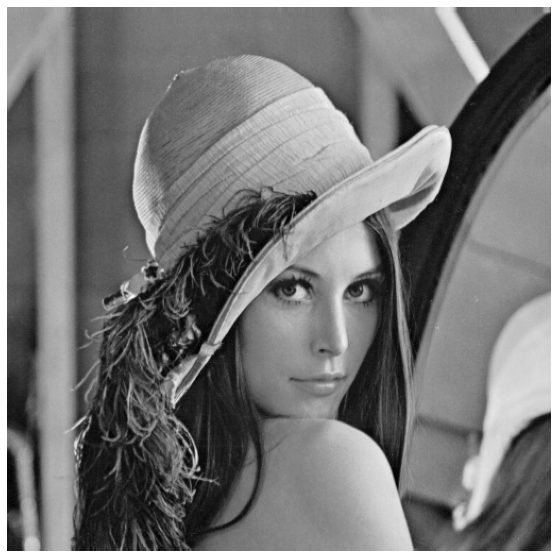

In [3]:
plt.figure(figsize=(10,10))
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.show()

## Convolution with various kernels

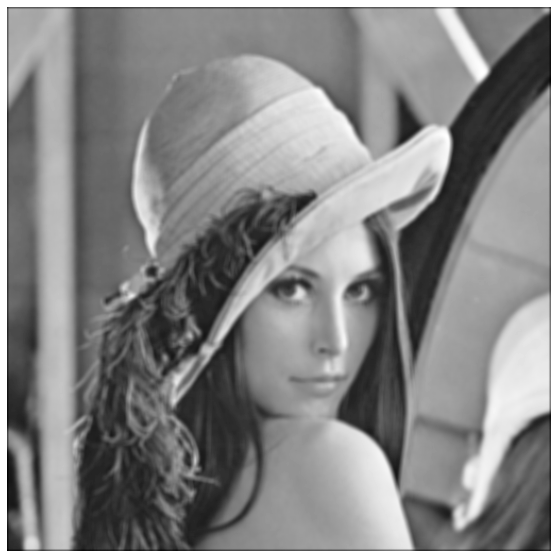

In [8]:
tim_conv = F.conv2d(tim.cpu(), kernel5.cpu(), padding='same')
im_conv = tim_conv.cpu().detach().numpy()
im_conv = np.squeeze(im_conv)

plt.figure(figsize=(10,10))
plt.imshow(im_conv, cmap='gray')
plt.axis('off')
plt.show()